In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import random
random.seed(100)
emoData_365 = []
for i in range(365):
    y = (5/365)*i + random.random()
    emoData_365.append(y)
emoData_365 = np.array(emoData_365)[:,None]
# print(bioData_365)
# print(len(bioData_365))

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
emoData_365 = scaler.fit_transform(emoData_365)
#print(bioData_365)

In [4]:
look_back = 40
train_marker = int(0.6*len(emoData_365))
val_marker = int(0.8*len(emoData_365))

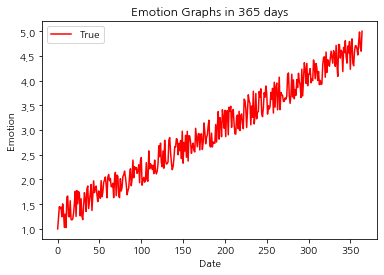

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.clf()
plt.title("Emotion Graphs in 365 days")
plt.xlabel("Date")
plt.ylabel("Emotion")
plot_x = np.arange(365)
plot_y = emoData_365
plt.plot(plot_x, plot_y, color="red", label="True")
plt.legend(loc='best')
plt.show()

In [6]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
train = emoData_365[:train_marker]
val = emoData_365[train_marker:val_marker]
test = emoData_365[val_marker:]

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [9]:
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

Train on 179 samples, validate on 33 samples
Epoch 1/200
179/179 [==============================] - 1s 4ms/step - loss: 4.0619 - val_loss: 8.5020
Epoch 2/200
179/179 [==============================] - 0s 1ms/step - loss: 2.5557 - val_loss: 6.0994
Epoch 3/200
179/179 [==============================] - 0s 1ms/step - loss: 1.5877 - val_loss: 4.2069
Epoch 4/200
179/179 [==============================] - 0s 981us/step - loss: 0.8732 - val_loss: 2.8031
Epoch 5/200
179/179 [==============================] - 0s 1ms/step - loss: 0.4014 - val_loss: 1.8706
Epoch 6/200
179/179 [==============================] - 0s 997us/step - loss: 0.4199 - val_loss: 1.4114
Epoch 7/200
179/179 [==============================] - 0s 931us/step - loss: 0.3755 - val_loss: 1.3607
Epoch 8/200
179/179 [==============================] - 0s 934us/step - loss: 0.3579 - val_loss: 1.5041
Epoch 9/200
179/179 [==============================] - 0s 950us/step - loss: 0.3178 - val_loss: 1.6655
Epoch 10/200
179/179 [==============

179/179 [==============================] - 0s 942us/step - loss: 0.1244 - val_loss: 0.1302
Epoch 80/200
179/179 [==============================] - 0s 981us/step - loss: 0.1245 - val_loss: 0.1459
Epoch 81/200
179/179 [==============================] - 0s 984us/step - loss: 0.1039 - val_loss: 0.1798
Epoch 82/200
179/179 [==============================] - 0s 992us/step - loss: 0.1261 - val_loss: 0.1318
Epoch 83/200
179/179 [==============================] - 0s 951us/step - loss: 0.1552 - val_loss: 0.1391
Epoch 84/200
179/179 [==============================] - 0s 939us/step - loss: 0.1193 - val_loss: 0.1492
Epoch 85/200
179/179 [==============================] - 0s 936us/step - loss: 0.1329 - val_loss: 0.1331
Epoch 86/200
179/179 [==============================] - 0s 975us/step - loss: 0.1452 - val_loss: 0.0916
Epoch 87/200
179/179 [==============================] - 0s 947us/step - loss: 0.1238 - val_loss: 0.1107
Epoch 88/200
179/179 [==============================] - 0s 1ms/step - loss: 0

179/179 [==============================] - 0s 886us/step - loss: 0.1243 - val_loss: 0.1378
Epoch 158/200
179/179 [==============================] - 0s 880us/step - loss: 0.1169 - val_loss: 0.1721
Epoch 159/200
179/179 [==============================] - 0s 900us/step - loss: 0.1235 - val_loss: 0.1873
Epoch 160/200
179/179 [==============================] - 0s 869us/step - loss: 0.1496 - val_loss: 0.1415
Epoch 161/200
179/179 [==============================] - 0s 875us/step - loss: 0.1326 - val_loss: 0.1681
Epoch 162/200
179/179 [==============================] - 0s 886us/step - loss: 0.1215 - val_loss: 0.1950
Epoch 163/200
179/179 [==============================] - 0s 875us/step - loss: 0.1129 - val_loss: 0.2428
Epoch 164/200
179/179 [==============================] - 0s 869us/step - loss: 0.1121 - val_loss: 0.1832
Epoch 165/200
179/179 [==============================] - 0s 864us/step - loss: 0.1069 - val_loss: 0.1959
Epoch 166/200
179/179 [==============================] - 0s 928us/ste

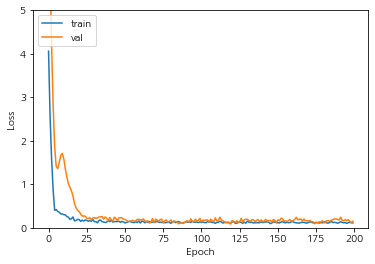

In [12]:
plt.clf()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 5.0)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.043133659069764546
Validataion Score:  0.1517968914951339
Test Score:  0.8792781540841768


In [26]:
look_ahead = 30
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])

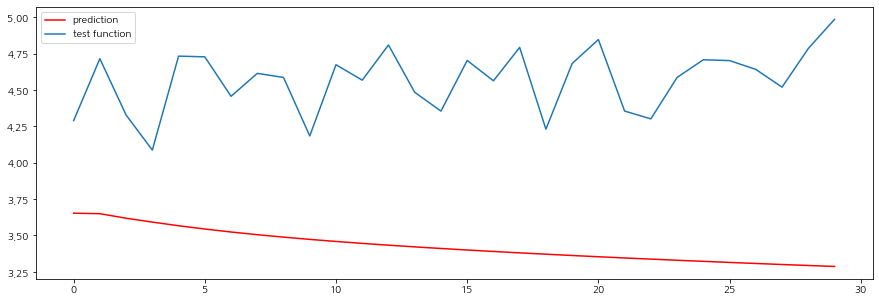

In [28]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()